Daniel Koltai

2123303

In [2]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# 3A: Time series classification

## Task description

Your time-series challenge is to classify whether a child’s handwriting is affected by dysgraphia (a writing
disorder). The dataset is a modified dataset obtained from [1]. Data was collected using a using a WACOM
Intuos Pro Large tablet. The children wrote with 3 letter ’l’s with a pen on paper that was positioned on
the tablet. The features are all numeric and represent the 5 different signals collected from the tablet over
time.

- pen movement in the x-direction,
- pen movement in the y-direction
- whether the pen was on the surface (1) or in the air (0)
- the pressure of the pen on the tablet surface

There are no missing values in the dataset.
You are provided a file ts_challenge.npz contains 2 numpy arrays, 1 being the features, and the other
being the labels. You can load the file by using the following line of code if you put the file in the same
folder as your code file (e.g., notebook):

In [3]:
data = np.load('ts_challenge.npz')
X = data['arr_0']
y = data['arr_1']

In [4]:
print(data['arr_0'].shape)
print(data['arr_1'].shape)

(120, 4, 2000)
(120,)


Your task is to train a KNN time series classifier and another classifier of your choice, to classify whether
the time series data is from a child with or without dysgraphia. You should also compare model performances.

## 1. (4 points) 
Split your dataset into testing and training data. Train a KNN time series classifier with 5
nearest neighbours. The classifier will serve as your baseline. Evaluate the classification accuracy on the
test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [6]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4, 2000)
(120,)
(60, 4, 2000)
(60,)
(30, 4, 2000)
(30,)


In [7]:
clf = KNeighborsTimeSeriesClassifier(n_neighbors=5)
clf.get_params()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.6333333333333333

## 2 (4 points) 
Using GridSearchCV on the training data, fit the KNN time series classifier with a 5-fold
cross validation. Find the nearest neighbour hyperparameter with 3 different C values. Evaluate the
classification accuracy on the test set.

In [22]:
param_grid = {'n_neighbors': [3, 5, 7]}
clf = KNeighborsTimeSeriesClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'best params: {grid_search.best_params_}')
print(f'5-fold cross validation score: {grid_search.best_score_*100:.2f}')

y_pred = grid_search.predict(X_test)
print(f'classification accuracy on test set: {accuracy_score(y_test, y_pred)*100:.2f}%')

best params: {'n_neighbors': 7}
5-fold cross validation score: 76.67
classification accuracy on test set: 63.33%


## 3. (5 points) 
Train another time series classifier of your choice. Evaluate the classification accuracy.

In [9]:
# count the number of times each class appears
Counter(y_train)

Counter({0: 31, 1: 29})

### Plot of drawings

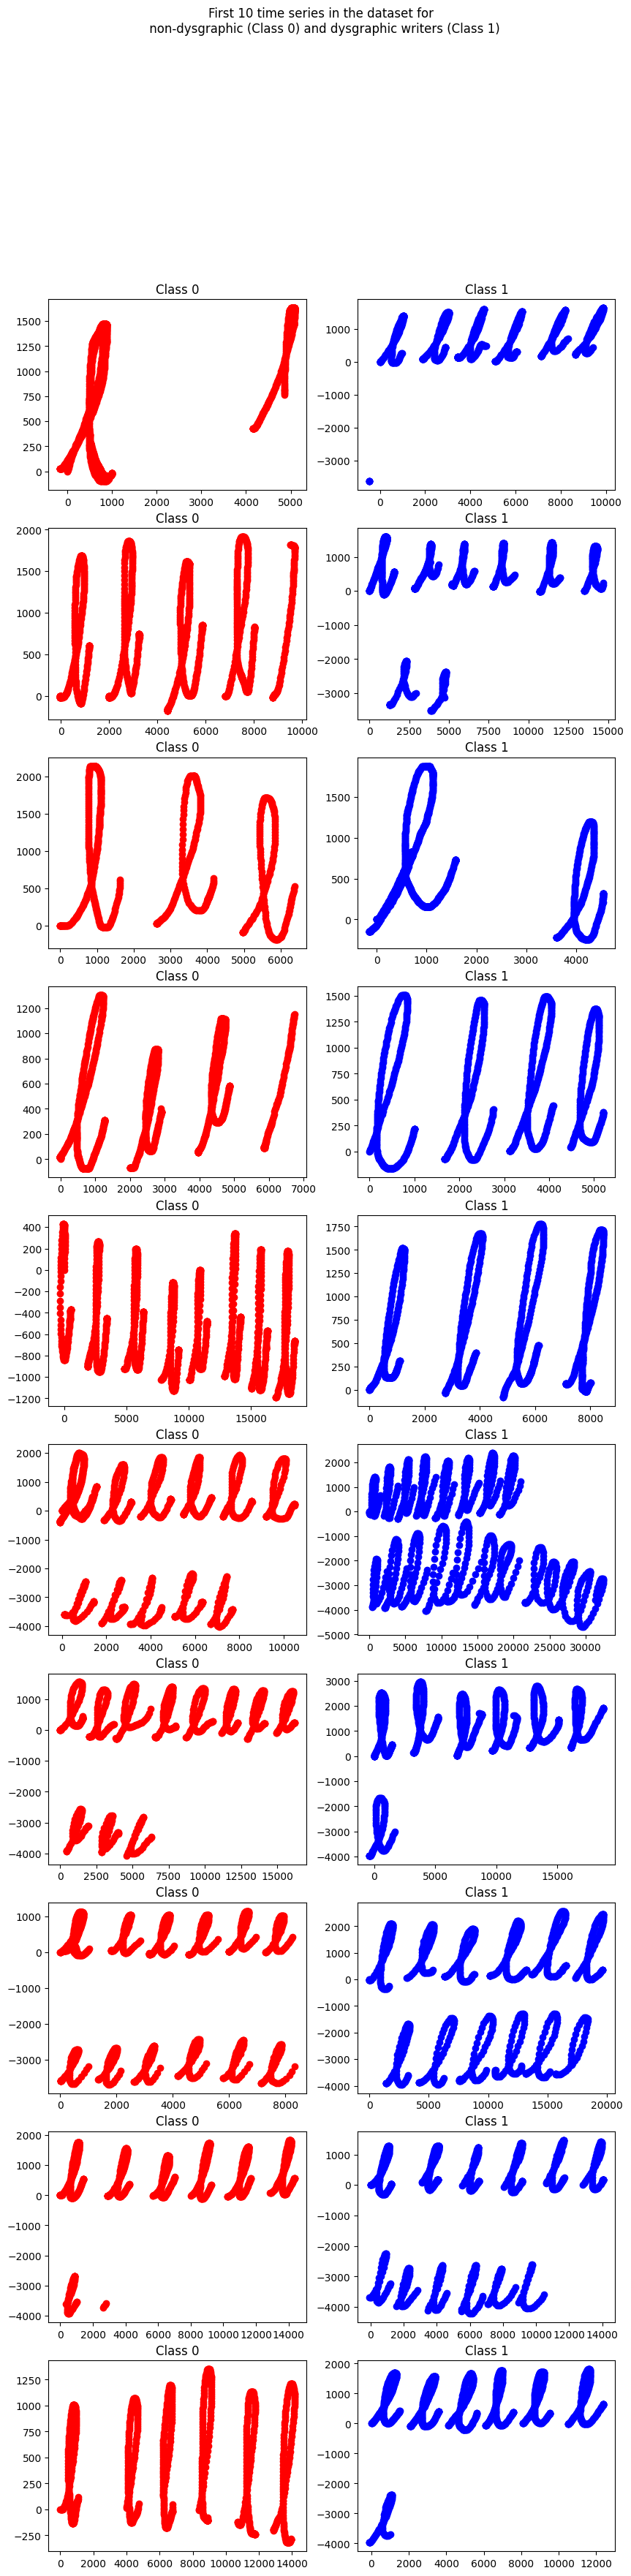

In [10]:
# reconstruct the drawings from the time series
# plot the first 2 channels
# they are x and y coordinates of a point moving in 2D space
# the third channel tells if the pen was on the surface (1) or in the air (0)
# only plot a point if the pen was on the surface
# plot according to labels

y0 = np.where(y_train == 0)
y1 = np.where(y_train == 1)

plt.figure(figsize=(10, 40))
for i in range(10):
    ind = y0[0][i]
    plt.subplot(10, 2, i*2+1)
    plt.title('Class 0')
    for j in range(len(X[ind][0])):
        if X[ind][2][j] == 1:
            plt.plot(X[ind][0][j], X[ind][1][j], 'ro')
for i in range(10):
    ind = y1[0][i]
    plt.subplot(10, 2, i*2+2)
    plt.title('Class 1')
    for j in range(len(X[ind][0])):
        if X[ind][2][j] == 1:
            plt.plot(X[ind][0][j], X[ind][1][j], 'bo')
plt.suptitle('First 10 time series in the dataset for \n non-dysgraphic (Class 0) and dysgraphic writers (Class 1)') 
plt.show()

### Ideas/notes

- autocorrelation?

Dysgraphia detection through machine learning - Peter Drotár & Marek Dobeš

"We compared several machine learning algorithms and discovered that the
best results were achieved by the adaptive boosting (AdaBoost) algorithm"

"Features such as **maximum segment vertical length**, **minimum segment height**, and **diference between maximum y-positions of the second and penultimate segments** can be directly related to changes in handwriting due to dysgraphia."

"the proposed approach was able to recognize dysgraphic handwriting with almost 80% accuracy"


"To find the optimal solution for our task, we experimented with several classifcation algorithms and employed an automated machine learning tool, TPOT"

"AdaBoost, random forest and SVM'

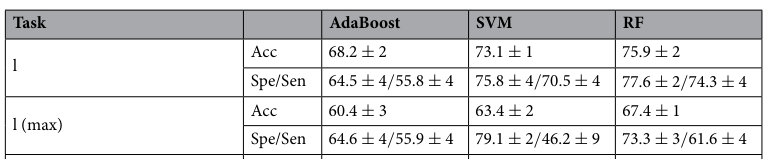

In [11]:
# extract all the 1-st channels to X_train_1
'''
def transfrom_data(X, i):
    X_train_0[i] = X_train[0, :]
    X_train_1[i] = X_train[1, :]
    X_train_2[i] = X_train[2, :]
    X_train_3[i] = X_train[3, :]
'''

X_train_0 = X_train[:, 0, :]
X_train_1 = X_train[:, 1, :]
X_train_2 = X_train[:, 2, :]
X_train_3 = X_train[:, 3, :]

X_val_0 = X_val[:, 0, :]
X_val_1 = X_val[:, 1, :]
X_val_2 = X_val[:, 2, :]
X_val_3 = X_val[:, 3, :]

X_test_0 = X_test[:, 0, :]
X_test_1 = X_test[:, 1, :]
X_test_2 = X_test[:, 2, :]
X_test_3 = X_test[:, 3, :]

# classify each of the 4 channels separately


(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='0'>, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

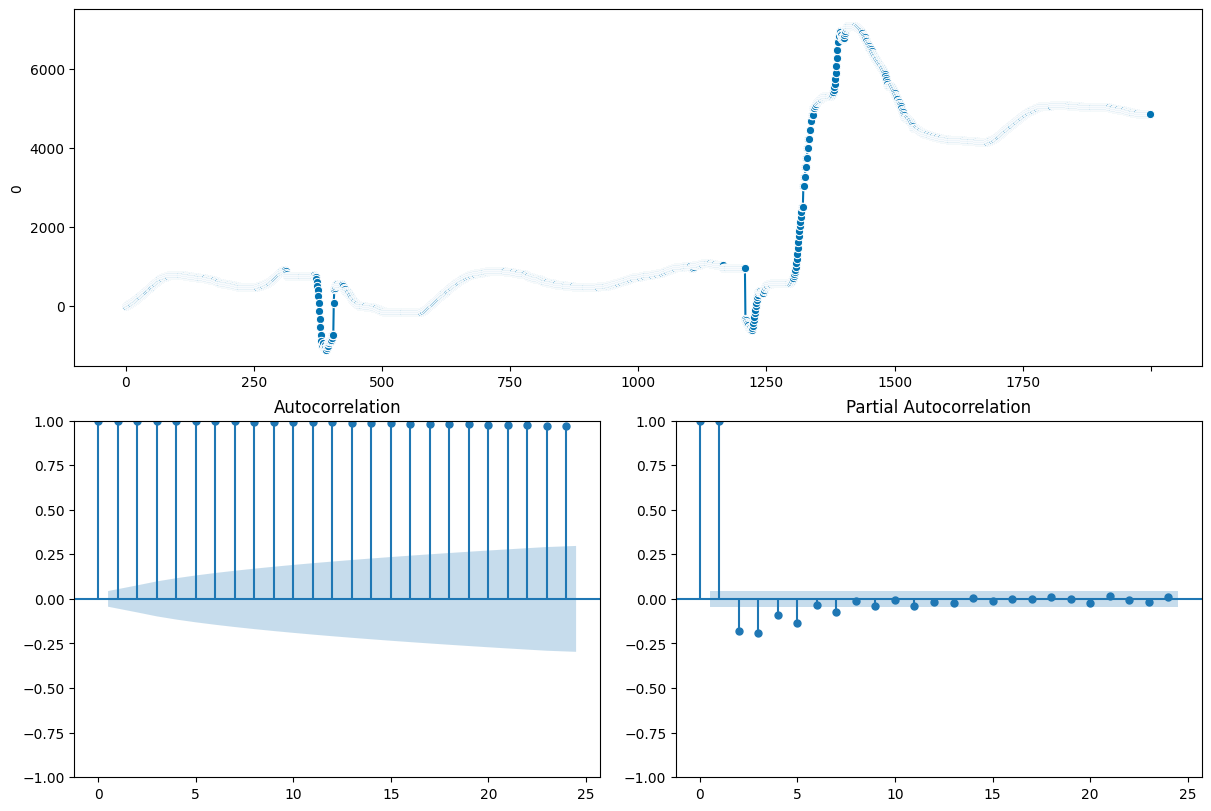

In [44]:
# autocorrelations
# convert X[0] (has 4 channels) to a pandas dataframe
import pandas as pd
X0 = pd.DataFrame(X[0].T)
X0

# get the autocorrelation of the first time series
from sktime.utils.plotting import plot_correlations
plot_correlations(X0[0])

### Classifiers

In [18]:
# catch22classifier
from sktime.classification.feature_based import Catch22Classifier
from sklearn.ensemble import RandomForestClassifier
#from sktime.datasets import load_unit_test
#X_train, y_train = load_unit_test(split="train", return_X_y=True)
#X_test, y_test = load_unit_test(split="test", return_X_y=True) 
clf = Catch22Classifier(
    estimator=RandomForestClassifier(n_estimators=5),
    outlier_norm=True,
) 
clf.fit(X_train, y_train) 
#Catch22Classifier(...)
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred)

0.6333333333333333

In [13]:
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import accuracy_score

# Fit a rocket model on the training data
rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)
X_val_transform = rocket.transform(X_val)
X_test_transform = rocket.transform(X_test)

# Train a classifier on the transformed training data
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(X_train_transform, y_train)

# Predict on the transformed validation data
y_val_pred = classifier.predict(X_val_transform)

# Evaluate the model on the validation data
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.7666666666666667


## 4. (2 points) 
You are provided with a hold-out test set (without any labels). With your best classifiter,
predict the class of each instance in the hold-out test set. Save your predicted results in a csv file and
upload this file onto Canvas.

In [30]:
test_data = np.load('ts_test.npz')
Xtest = test_data['arr_0']